<a href="https://colab.research.google.com/github/doeungim/ADP_DE2/blob/main/4_LightGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LightGBM (Light Gradient Boosting Machine)

## 1. LightGBM의 특징
- **Gradient Boosting Framework**:
  - LightGBM은 Gradient Boosting을 기반으로 설계된 고성능 머신러닝 프레임워크입니다.
- **리프 중심(Tree-based Leaf-Wise) 성장 방식**:
  - 기존의 레벨 중심(Level-Wise) 방식이 아닌 리프 중심 방식으로 트리를 성장시킴으로써, 더 깊은 트리를 생성하여 학습 속도와 예측 성능을 향상.
- **큰 데이터와 고차원 데이터에 최적화**:
  - 큰 데이터셋과 고차원 특징(feature)이 있는 데이터에서도 효율적으로 학습 가능.
- **Categorical Feature 지원**:
  - 범주형 데이터를 자동으로 처리하여 별도의 전처리가 필요하지 않음.

## 2. LightGBM의 장점
1. **학습 속도가 빠름**:
   - 데이터 병렬 처리 및 최적화된 트리 구조로 다른 Gradient Boosting 알고리즘보다 학습 속도가 훨씬 빠름.
2. **메모리 사용량 절감**:
   - Histogram 기반 알고리즘을 사용하여 메모리 효율적.
3. **정확도 향상**:
   - 리프 중심 트리 성장 방식으로 복잡한 데이터의 패턴을 잘 학습.
4. **대규모 데이터 처리**:
   - 수백만 개 이상의 샘플과 고차원 데이터를 효과적으로 처리 가능.
5. **범주형 변수 처리**:
   - 범주형 데이터를 직접 입력할 수 있어 별도의 One-Hot Encoding 필요 없음.
6. **조기 종료 기능 (Early Stopping)**:
   - 성능이 개선되지 않을 경우 학습을 중단하여 계산 시간 단축.

## 3. LightGBM의 단점
1. **과적합 위험**:
   - 리프 중심 트리 성장 방식은 깊은 트리를 생성하기 쉬워 과적합(overfitting) 가능성이 높음.
   - 적절한 하이퍼파라미터 튜닝이 필수.
2. **작은 데이터셋에서 비효율적**:
   - 작은 데이터셋에서는 성능이 Gradient Boosting이나 XGBoost보다 낮을 수 있음.
3. **노이즈 민감도**:
   - 데이터에 노이즈가 많을 경우 성능이 저하될 가능성이 있음.
4. **설정 복잡성**:
   - 하이퍼파라미터가 많아 최적화를 위해 많은 시도가 필요함.

## 4. LightGBM의 적용 예
1. **이진 분류**:
   - 고객 이탈 예측, 사기 탐지 등 이진 분류 문제에서 효과적.
2. **다중 클래스 분류**:
   - 이미지 분류, 텍스트 분류 등 다중 클래스 분류 문제.
3. **회귀 분석**:
   - 주택 가격 예측, 매출 예측 등 연속형 값 예측 문제.
4. **랭킹 문제**:
   - 추천 시스템에서 사용자 선호도를 랭킹화하는 작업.
5. **대규모 데이터**:
   - 수백만 개 이상의 샘플과 고차원 데이터가 포함된 대규모 데이터셋에서 효과적.

## 5. LightGBM 주요 하이퍼파라미터
### (1) **학습 과정 관련 파라미터**
- **learning_rate**: 학습률 (기본값: 0.1)
  - 낮을수록 학습 속도는 느려지지만 더 안정적.
  - 일반적으로 0.01~0.1 사이의 값 사용.
  
- **num_leaves**: 하나의 트리가 가질 수 있는 최대 리프 노드 개수 (기본값: 31)
  - 값이 클수록 트리가 깊어져 과적합 가능성 증가.
  - 일반적으로 \(2^{\text{max_depth}} - 1\)보다 작게 설정.

- **max_depth**: 트리의 최대 깊이 (기본값: -1, 제한 없음)
  - 과적합 방지를 위해 적절한 값 설정 권장.

- **n_estimators**: 생성할 트리의 개수 (기본값: 100)
  - 값이 클수록 성능은 향상되지만 계산 시간 증가.

### (2) **과적합 방지 관련 파라미터**
- **min_data_in_leaf**: 리프 노드에 있어야 하는 최소 샘플 수 (기본값: 20)
  - 과적합 방지.
  
- **lambda_l1, lambda_l2**: L1, L2 정규화 값 (기본값: 0)
  - 모델 복잡도를 줄이고 과적합 방지.

- **bagging_fraction**: 학습 샘플의 비율 (기본값: 1.0)
  - 0.5로 설정하면 50% 샘플만 사용하여 학습.

- **feature_fraction**: 사용될 피처의 비율 (기본값: 1.0)
  - 0.8로 설정하면 80% 피처만 랜덤하게 선택하여 학습.

### (3) **데이터 처리 관련 파라미터**
- **categorical_feature**: 범주형 변수의 열 이름 또는 인덱스.
  - LightGBM이 자동으로 처리.
  
- **max_bin**: 히스토그램 빌딩에 사용될 최대 bin 개수 (기본값: 255)
  - 값이 클수록 정확도는 증가하지만 계산 속도가 느려짐.

## 6. LightGBM 사용 예제 (Python Code)
```python
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 데이터 준비
X = data.drop('target', axis=1)
y = data['target']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM 모델 생성
model = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=-1,
    num_leaves=31,
    random_state=42
)

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")



In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/fraud.csv'
data = pd.read_csv(file_url)

In [65]:
df = data.copy()
print(round(df.describe() ,2))
print("""
  amt 의 max 값과 city_pop의 max값이 급격하게 높기 때문에, 이상치로 의심해볼 수 있겠다.
  is_fraud의 경우, mean 값이 0.01로 매우 낮은데 fraud가 1%인 경우로 매우 낮기 때문에, 이점에 유의해야한다.
  데이터가 불균형이 있을 수 있으니, 차후 오버 샘플링으로 예측 정확도를 높힌다.
""")

             cc_num         amt         zip         lat        long  \
count  1.852394e+06  1852394.00  1852394.00  1852394.00  1852394.00   
mean   4.173860e+17       70.06    48813.26       38.54      -90.23   
std    1.309115e+18      159.25    26881.85        5.07       13.75   
min    6.041621e+10        1.00     1257.00       20.03     -165.67   
25%    1.800429e+14        9.64    26237.00       34.67      -96.80   
50%    3.521417e+15       47.45    48174.00       39.35      -87.48   
75%    4.642255e+15       83.10    72042.00       41.94      -80.16   
max    4.992346e+18    28948.90    99921.00       66.69      -67.95   

         city_pop     unix_time   merch_lat  merch_long    is_fraud  
count  1852394.00  1.852394e+06  1852394.00  1852394.00  1852394.00  
mean     88643.67  1.358674e+09       38.54      -90.23        0.01  
std     301487.62  1.819508e+07        5.11       13.76        0.07  
min         23.00  1.325376e+09       19.03     -166.67        0.00  
25%       

In [66]:
# 데이터 전처리
df.drop(['first','last','street','city','state','zip','trans_num','unix_time','job','merchant'], axis=1, inplace= True)

In [67]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

Z-score의 정의와 역할

- Z-score는 표준 점수라고도 불리며, 특정 데이터 포인트가 평균으로부터 얼마나 떨어져 있는지를 표준편차의 단위로 나타낸 값입니다. </br>
Z-score를 사용하면 서로 다른 데이터 분포를 가진 데이터들을 표준화하여 비교할 수 있습니다. 예를 들어, 서로 다른 평균과 표준편차를 가진 두 데이터 세트에서 특정 값이 얼마나 특이한지를 비교할 때 유용합니다.</br>
Z-score를 통해서 주어진 데이터 포인트가 평균에서 얼마나 떨어져 있는지를 표준편차 단위로 표현합니다.</br>
Z-score를 이용하여 특정 데이터 포인트가 정규 분포 내에서 얼마나 확률적으로 발생하는지를 확인 할 수 있습니다.</br>
Z-score를 통해 서로 다른 정규 분포를 갖는 두 점수를 비교할 수 있습니다.
실생활에서 z-score는 의료 평가, 시험 채점, 비즈니스 의사 결정 및 투자 및 거래 기회 측정과 같은 다양한 응용 분야에서 사용됩니다.

**Z-score의 활용**

- **이상치 식별**: Z-score가 매우 크거나 작은 값(예: ±3 이상)을 갖는 데이터 포인트는 이상치로 간주될 수 있습니다. 이를 통해 데이터에서 비정상적인 패턴을 식별할 수 있습니다.
- **데이터 비교**: 서로 다른 분포를 가진 데이터 세트 간의 상대적 위치를 비교할 수 있습니다. 예를 들어, 서로 다른 시험에서 학생들의 성적을 Z-score로 변환하여 상대적 우위를 비교할 수 있습니다.
-**확률 계산**: 정규 분포를 가정할 때, Z-score를 사용하여 특정 데이터 포인트가 나타날 확률을 계산할 수 있습니다.

In [68]:
#결제 금액의 이상 패턴 감지:

df['z_score'] = df.groupby('cc_num')['amt'].transform(lambda x: (x - x.mean()) / x.std())

#카테고리별 결제 금액의 이상 패턴 감지:

df['cat_z_score'] = df.groupby(['cc_num', 'category'])['amt'].transform(lambda x : (x - x.mean()) / x.std())

In [69]:
import geopy.distance
# geopy.distance.distance((위도1, 경도1), (위도2, 경도2))
# 상점에 대한 위치
df['merch_coord'] = pd.Series(zip(df['merch_lat'], df['merch_long']))
#고객주소의 위치
df['cust_coord'] = pd.Series(zip(df['lat'], df['long']))

# 거리 계산하기 (상점-고객) : apply 형태
df['distance'] = df.apply(lambda x : geopy.distance.distance(x['merch_coord'], x['cust_coord']).km, axis =1)

In [70]:
df['distance_z_score']= df.groupby(['cc_num','distance'])['amt'].transform(lambda x : (x- x.mean()) / x.std())

In [71]:
# 나이 구하기
df['age'] = 2023 - pd.to_datetime(df['dob']).dt.year

# 범주형 변수
df = pd.get_dummies(df, columns = ['gender','category'], drop_first = True, dtype = 'int')


In [73]:
df2 = df.copy()
df2.set_index('trans_date_trans_time', inplace = True)
df3 = df2.drop(columns = ['lat','long','dob','merch_lat','merch_long','merch_coord','cust_coord'] , axis = 1)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 7639, number of negative: 1319094
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.147726 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1632
[LightGBM] [Info] Number of data points in the train set: 1326733, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.005758 -> initscore=-5.151434
[LightGBM] [Info] Start training from score -5.151434
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    523649
           1       0.62      0.61      0.61      2012

    accuracy                           1.00    525661
   macro avg       0.81      0.80      0.81    525661
weighted avg       1.00      1.00      1.00    525661



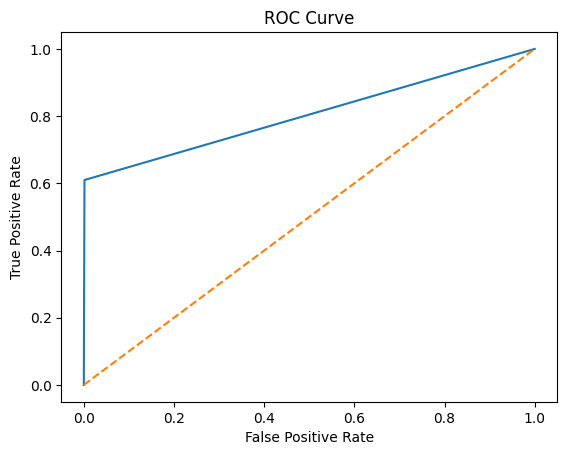

In [75]:
## 모델링 및 평가하기
train = df3[df3.index < '2020-07-01']
test = df3[df3.index >= '2020-07-01']

X_train = train.drop('is_fraud', axis = 1)
X_test = test.drop('is_fraud', axis = 1)
y_train = train['is_fraud']
y_test = test['is_fraud']

import lightgbm as lgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

lgb_model = lgb.LGBMClassifier(random_state = 123)
lgb_model.fit(X_train, y_train)
pred = lgb_model.predict(X_test)
accuracy_score(y_test, pred)

print(classification_report(y_test, pred))

fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# 이상치 감지 거래는 이상한 거래를 조금 더 포착해야함
# 실제 이상거래를 얼마나 감지 했는지에 대한 재현율이 중요
# TPR = TP / TP + FN = 실제 1인 것 중 얼만큼 제대로(1로) 예측했는가 = 1
# FPR = FP / TF + TN = 실제 0인 것 중 얼만큼 잘못으로 1로 예측했는가 = 0

from sklearn.model_selection import RandomizedSearchCV

- 랜덤 그리드 서치 : 모든 조합에 대해 랜덤으로 일부만 선택
  * 장점 : 시간 소요가 적음, 넓은 영역의 하이퍼 파라미터를 짧은 시간에 활용

- L1, L2 정규화
  선형 모델을 만드는 경우, 각 변수에 대한 기울기, 계수에 패널티를 부가하여 너무 큰 계수가 나오지 않도록 강제하는 방법, 각 변수에 대한 계수를 조금 더 작게 반영함으로써, 오버피팅을 방지

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

params = {
          'n_estimators': [100, 500, 1000],
          'learning_rate': [0.01, 0.05, 0.1, 0.3],
          'lambda_l1': [0,10,20,30,50],
          'lambda_l2': [0,10,20,30,50],
          'max_depth': [5,10,15,20],
          'subsample': [0.6, 0.8, 1]}

model_2 = lgb.LGBMClassifier(random_state = 100)
rs = RandomizedSearchCV(model_2, param_distributions = params, n_iter = 30, scoring = 'roc_auc', random_state=100, n_jobs=-1)
#lgbm.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=[(X_test, y_test)], verbose=False)

rs.fit(X_train, y_train)
print(rs.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


**LightGBM train 함수**

lgb.train() - 모델링 검증셋 지원/ 하이퍼파라미터 무조건 지정 / GridSearch, CV 불가

lgb.LGBMRegressor()
lgb.LGBMClassifier() - 모델링 검증셋 포함 안함, 기본값으로 모델링, 가능

In [26]:

train = df3[df3.index < '2020-01-01']
val = df3[(df3.index >= '2020-01-01') & (df3.index < '2020-07-01')]
test = df3[df3.index >= '2020-07-01']

X_train = train.drop('is_fraud', axis = 1)
X_val = val.drop('is_fraud', axis = 1)
X_test = test.drop('is_fraud', axis = 1)
y_train = train['is_fraud']
y_val = val['is_fraud']
y_test = test['is_fraud']

d_train = lgb.Dataset(X_train, label=y_train)
d_val = lgb.Dataset(X_val, label=y_val)

params_set = rs.best_params_  #최적 파라미터 설정
params_set['metrics'] = 'auc' #평가 기준 추가

In [ ]:
model_3 = lgb.train(params_set, d_train, valid_sets=[d_val], early_stopping_rounds=100,verbose_eval=100)
pred_3 = model_3.predict(X_test)
print(roc_auc_score(y_test, pred_3))

feature_imp = pd.DataFrame({'feature_name': X_train.columns, 'importance': model_1.feature_importances_}).sort_values('importance', ascending = False)
plt.figure(figsize=(20, 10))
sns.barplot(x="importance", y="feature_name", data=feature_imp.head(10))
plt.show()